# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.mixture import GaussianMixture as GMM
import seaborn as sns
sns.set(style='ticks')

# Data imports

In [2]:
mode1_df = pd.read_excel('mode1.xlsx')
mode1_df

,X
0,95.795
1,235.536
2,125.419
3,194.497
4,124.638
...,...
1495,152.745
1496,193.598
1497,200.250
1498,115.090


In [3]:
mode2_df = pd.read_excel('mode2.xlsx')
mode2_df = mode2_df.drop([0, 1], axis=0)
mode2_df.rename(columns = {'The SAS System':'X', 'Unnamed: 1':'Y'}, inplace = True)
mode2_df

,X,Y
2,107.705,95.795
3,85.02,235.536
4,154.556,125.419
5,119.904,194.497
6,131.874,124.638
...,...,...
1497,183.655,152.745
1498,104.12,193.598
1499,112.376,200.25
1500,121.172,115.09


# Mode1

## a

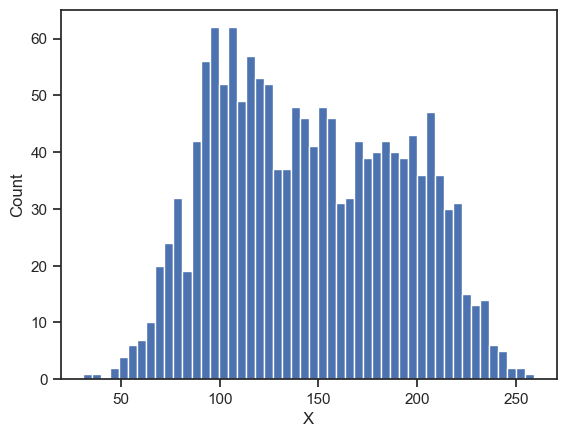

In [4]:
# initial histogram
plt.hist(mode1_df, bins=50)
plt.xlabel('X')
plt.ylabel('Count')
plt.savefig('mode1_hist.png', bbox_inches='tight')
plt.show()

## b

In [5]:
random_state = 42 # set random state for reproducibility

C:\Users\Armand\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Armand\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Armand\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Armand\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

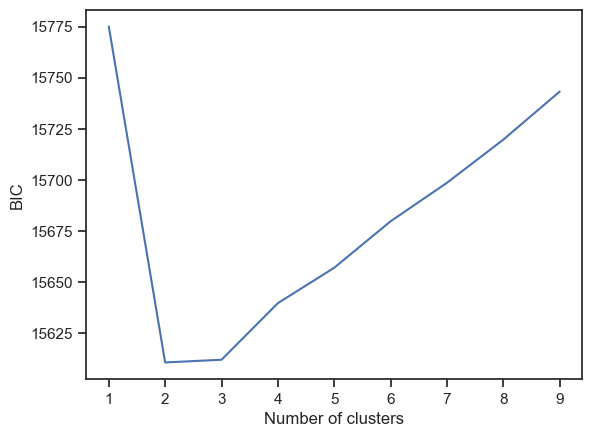

In [6]:
# set up bic graph for cluster perfomrance evaluation
n_components = np.arange(1,10)
gmm_models_mode1 = [GMM(n, random_state=random_state).fit(mode1_df) for n in n_components]
plt.plot(n_components, [mode1_model.bic(mode1_df) for mode1_model in gmm_models_mode1])
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.savefig('mode1_bic', bbox_inches='tight')
plt.show()

## c

In [7]:
# train model with 2 clusters
gmm_mode1_cluster2 = GMM(n_components=2, random_state=random_state).fit(mode1_df)

C:\Users\Armand\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [8]:
# classify data points
labels = gmm_mode1_cluster2.predict(mode1_df)

In [9]:
# Characterristics of clusters
mu_1, mu_2 = gmm_mode1_cluster2.means_[0], gmm_mode1_cluster2.means_[1]
std_var_1, std_var_2 = gmm_mode1_cluster2.covariances_[0], gmm_mode1_cluster2.covariances_[1]
print(mu_1, mu_2)
print(std_var_1, std_var_2)

[187.45078669] [110.73264491]
[[719.62245556]] [[651.51034186]]


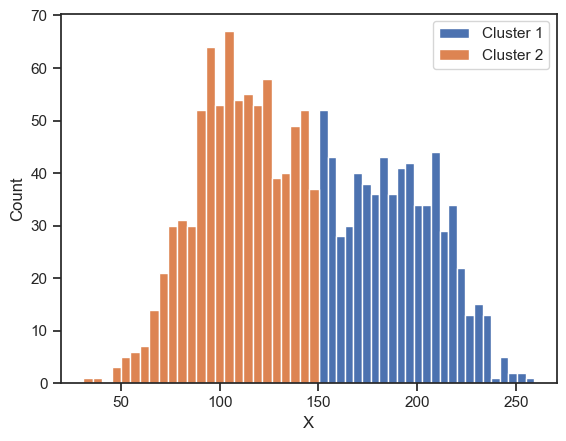

In [81]:
# plot histigram with colours indicating class label
mode1_with_label = mode1_df.copy()
mode1_with_label['Label'] = labels
cluster_1 = mode1_with_label[mode1_with_label['Label'] == 0]
cluster_2 = mode1_with_label[mode1_with_label['Label'] == 1]

plt.hist(cluster_1['X'], bins=25, label='Cluster 1')
plt.hist(cluster_2['X'], bins=25, label='Cluster 2')
plt.xlabel('X')
plt.ylabel('Count')
plt.legend()
plt.savefig('mode1_classified', bbox_inches='tight')
plt.show()

# Mode2

## a

C:\Users\Armand\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


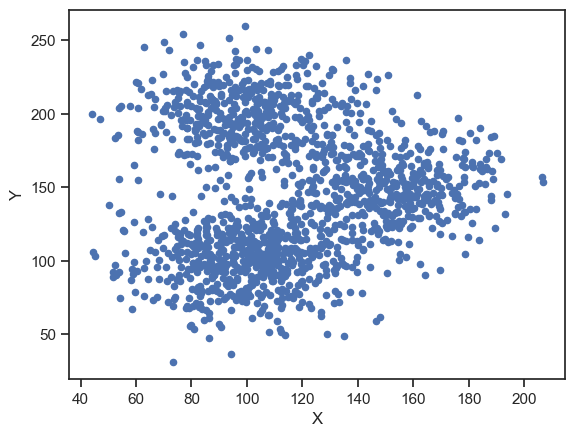

In [11]:
# create a scatter plot to visualize the 2 dimensional data
mode2_df.plot.scatter(x = 'X', y = 'Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('mode2_scatter', bbox_inches='tight')
plt.show()

## b

C:\Users\Armand\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Armand\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Armand\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Armand\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

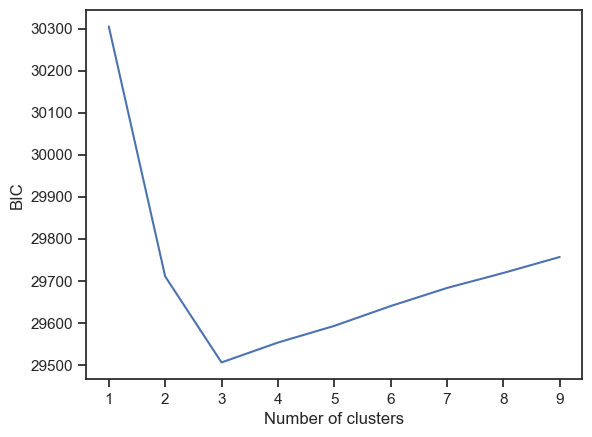

In [12]:
# set up bic graph for cluster perfomrance evaluation
n_components = np.arange(1,10)
gmm_models_mode2 = [GMM(n, random_state=random_state).fit(mode2_df) for n in n_components]
plt.plot(n_components, [mode2_model.bic(mode2_df) for mode2_model in gmm_models_mode2])
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.savefig('mode2_bic', bbox_inches='tight')
plt.show()

## c

In [13]:
# train model with 3 clusters
gmm_mode2_cluster3 = GMM(n_components=3, random_state=random_state).fit(mode2_df)

C:\Users\Armand\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [86]:
# classify data points
labels_mode2 = gmm_mode2_cluster3.predict(mode2_df)

In [34]:
# Characterristics of clusters
mu_1, mu_2, mu_3 = gmm_mode2_cluster3.means_[0], gmm_mode2_cluster3.means_[1], gmm_mode2_cluster3.means_[2]
cov_var_1, cov_var_2, cov_var_3 = gmm_mode2_cluster3.covariances_[0], gmm_mode2_cluster3.covariances_[1], gmm_mode2_cluster3.covariances_[2]

In [32]:
mu_1, mu_2, mu_3

(array([ 99.83565214, 200.15670861]),
 array([ 99.89817881, 100.60930416]),
 array([150.66251406, 148.95326016]))

In [35]:
cov_var_1, cov_var_2, cov_var_3

(array([[407.22966406,   1.90298578],
        [  1.90298578, 407.37989866]]),
 array([[396.0881303 ,   5.00759085],
        [  5.00759085, 410.52964527]]),
 array([[386.53617865,  37.7541019 ],
        [ 37.7541019 , 418.4545838 ]]))

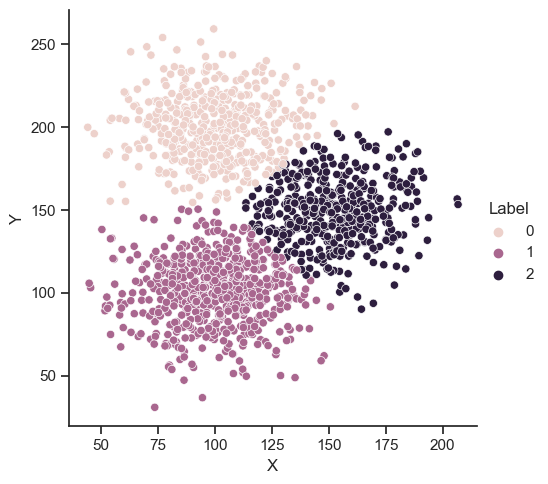

In [88]:
# plot histigram with colours indicating class label
mode2_with_label = mode2_df.copy()
mode2_with_label['Label'] = labels_mode2

sns.relplot(data=mode2_with_label, x='X', y='Y', hue='Label')
plt.savefig('mode2_classified', bbox_inches='tight')
plt.show()